### Import library

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


### Loading Cifar-10 dataset

In [2]:
### Loading Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


### Convalutional Neural Network (VGG-16)

In [13]:
inputs = keras.Input(shape=(32,32,3))
### first conv layer
x = layers.Conv2D(64, 3, activation = 'relu', padding = "same")(inputs)
x = layers.Conv2D(64, 3, activation = 'relu', padding = "same")(x)
x = layers.MaxPooling2D(2)(x)
### second conv layer
x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(x)
# x = layers.Conv2D(128, 3, activation = 'relu', padding = "same")(x)
# x = layers.MaxPooling2D(2)(x)
### third conv layer
x = layers.Conv2D(256, 3, activation = 'relu', padding = "same")(x)
# x = layers.Conv2D(256, 3, activation = 'relu', padding = "same")(x)
# x = layers.Conv2D(256, 3, activation = 'relu', padding = "same")(x)
x = layers.MaxPooling2D(2)(x)
### fourth conv layer
x = layers.Conv2D(512, 3, activation = 'relu', padding = "same")(x)
# x = layers.Conv2D(512, 3, activation = 'relu', padding = "same")(x)
# x = layers.Conv2D(512, 3, activation = 'relu', padding = "same")(x)
x = layers.MaxPooling2D(2)(x)
### Fully connected layer
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024)(x)
x = keras.layers.Dense(1024)(x)
# x = keras.layers.Dense(1024)(x)
x = keras.layers.Dense(10, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0   

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size = 256, )

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 340us/sample - loss: 3.9810 - accuracy: 0.3412
Epoch 2/50
50000/50000 [==============================] - 16s 328us/sample - loss: 1.3226 - accuracy: 0.5295
Epoch 3/50
50000/50000 [==============================] - 16s 328us/sample - loss: 1.1239 - accuracy: 0.6031
Epoch 4/50
50000/50000 [==============================] - 16s 329us/sample - loss: 0.9955 - accuracy: 0.6528
Epoch 5/50
50000/50000 [==============================] - 16s 329us/sample - loss: 0.8889 - accuracy: 0.6894
Epoch 6/50
50000/50000 [==============================] - 17s 331us/sample - loss: 0.8070 - accuracy: 0.7180
Epoch 7/50
50000/50000 [==============================] - 17s 331us/sample - loss: 0.7445 - accuracy: 0.7408
Epoch 8/50
50000/50000 [==============================] - 17s 338us/sample - loss: 0.6649 - accuracy: 0.7701
Epoch 9/50
50000/50000 [==============================] - 17s 332us/sample - loss: 0.6068 - accuracy: 0.7

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc*100, "%")

10000/10000 - 2s - loss: 1.8020 - accuracy: 0.7067

Test accuracy: 70.67000269889832 %


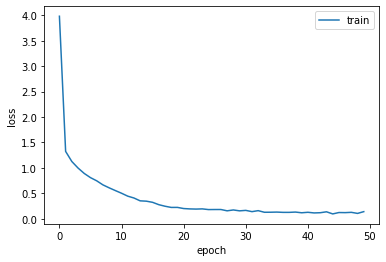

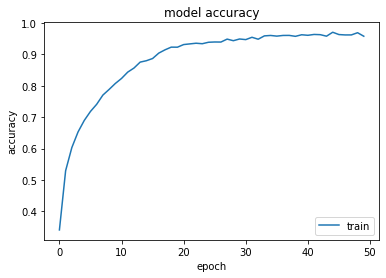

In [17]:
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#  "Accuracy"
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()